# Ensemble Learning 

## Laden & sample der Bilder

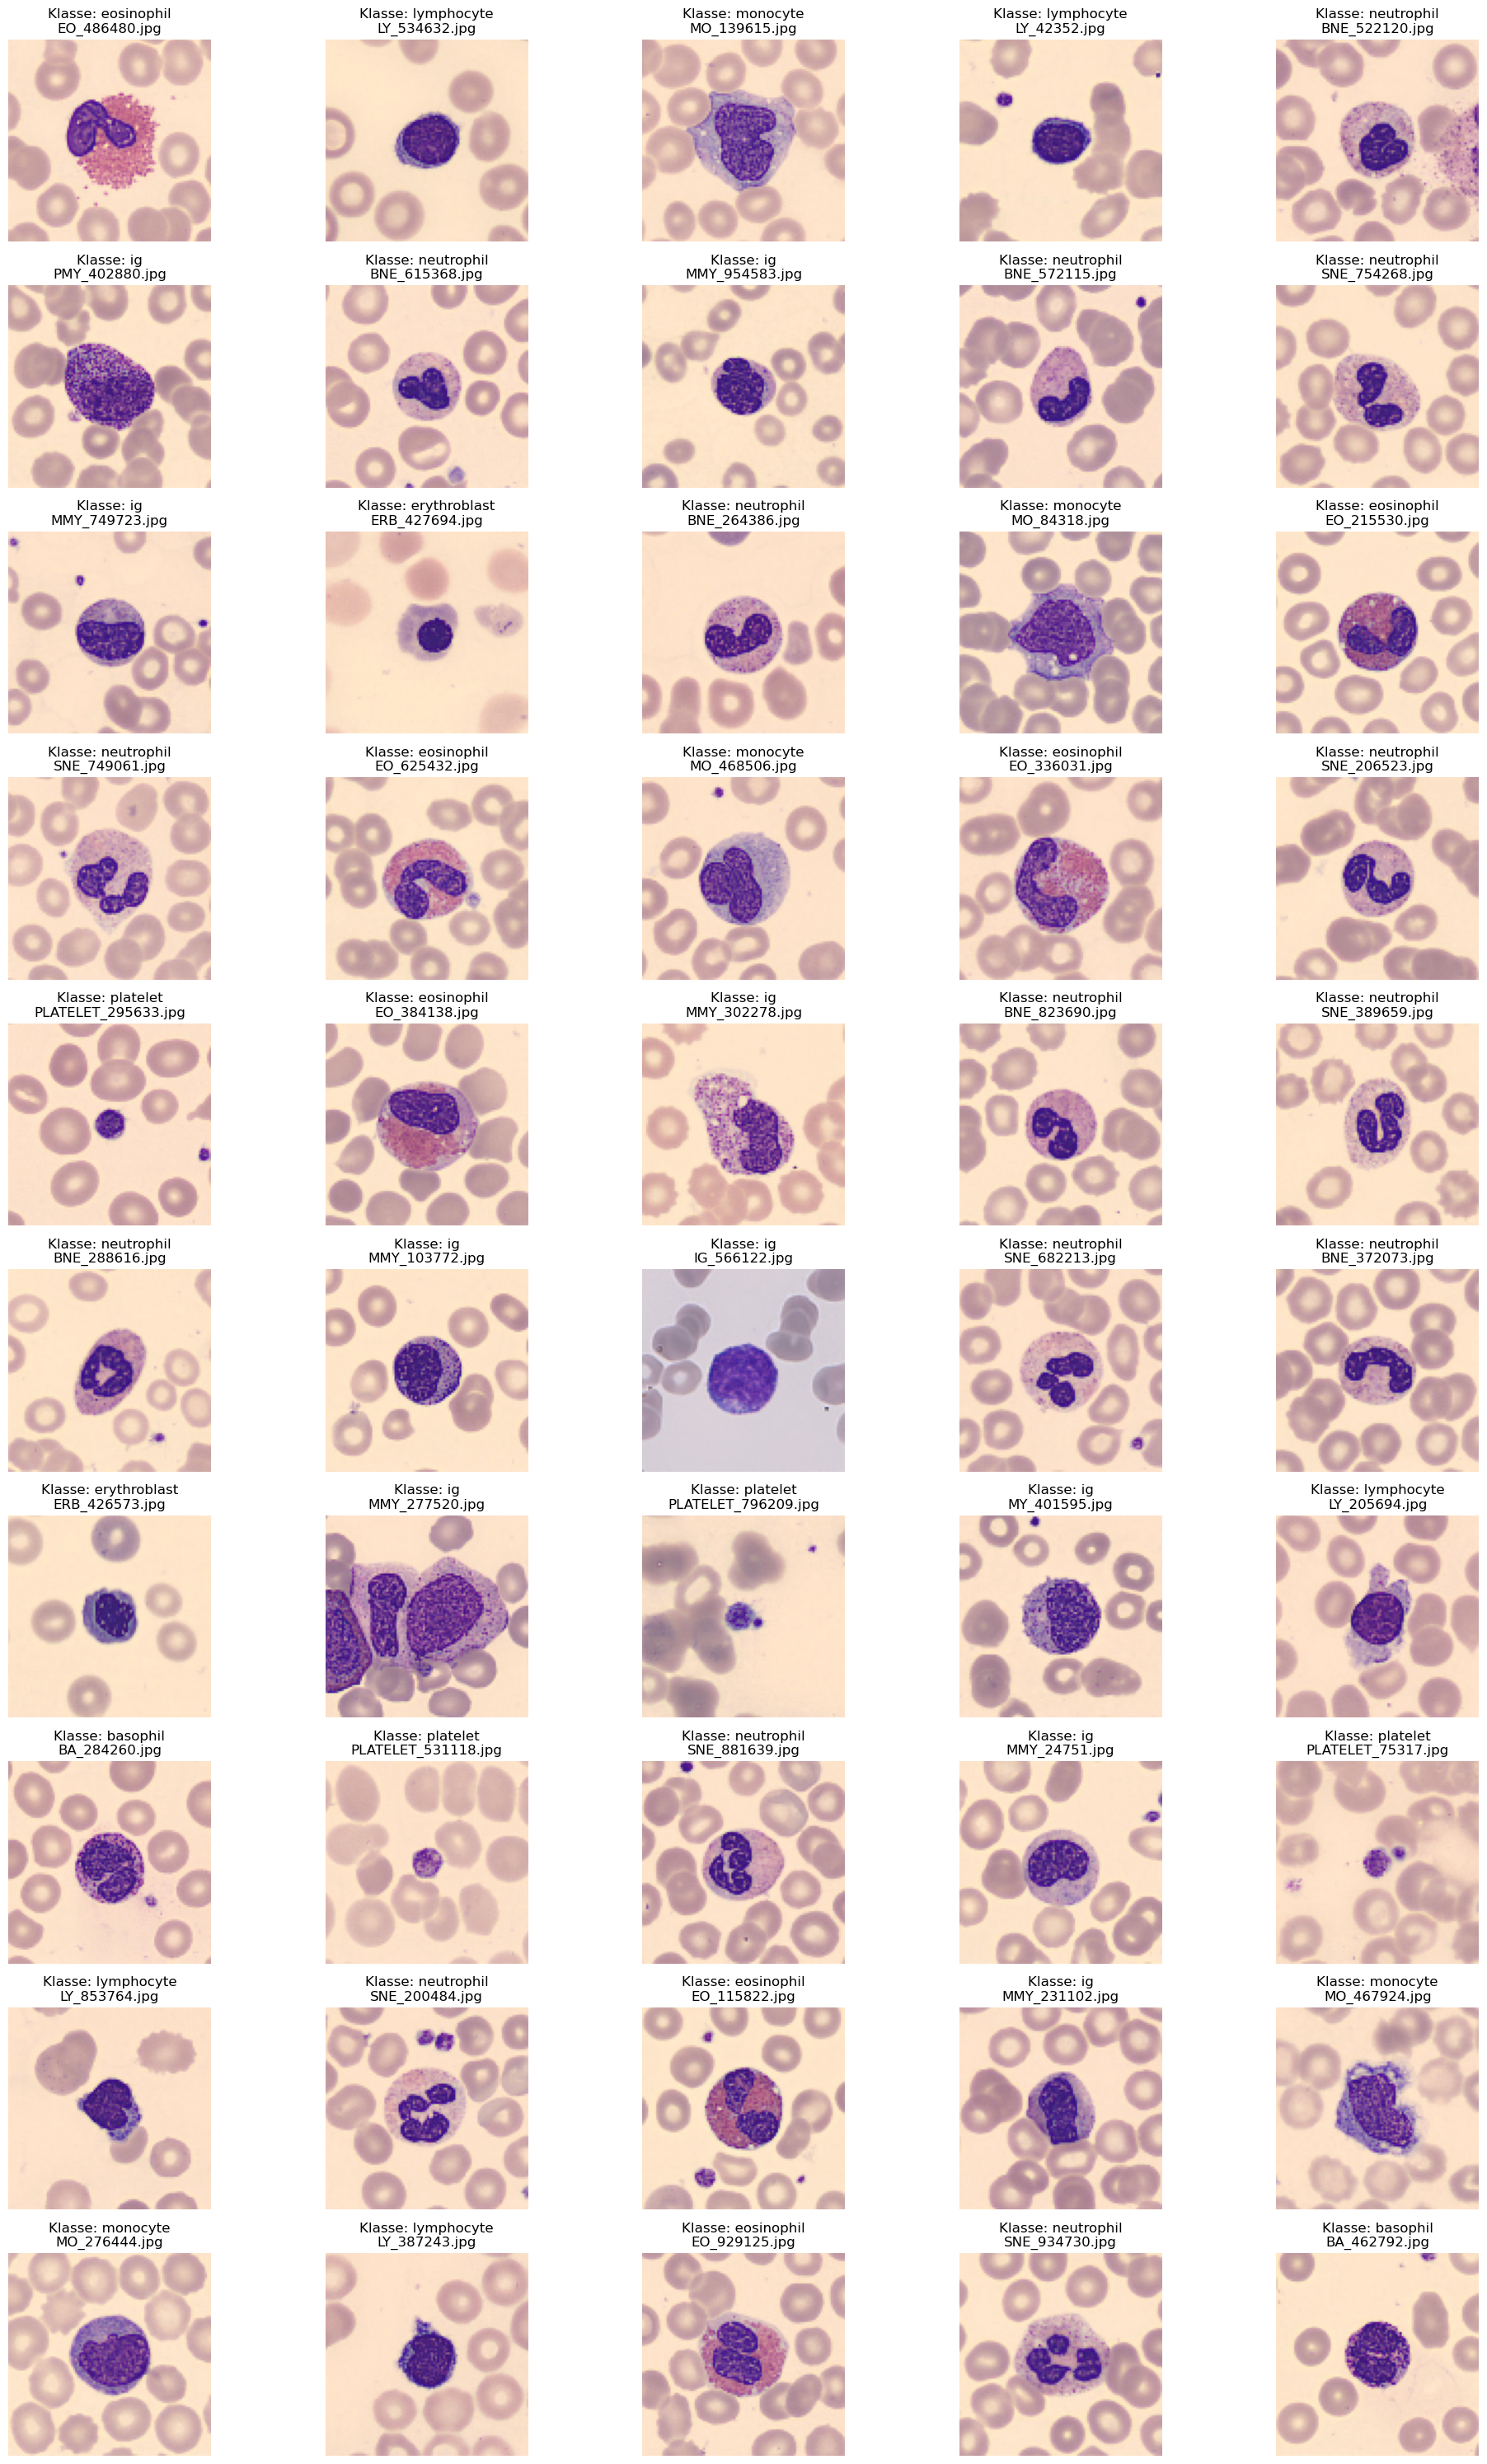

In [8]:
import os
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt

# Setze das Verzeichnis mit den Bildern
data_dir = "images/archive/bloodcells_dataset"

# Initialisiere leere Listen für Dateipfade, Graubilder, skalierte Bilder und Labels
filepaths = []
labels = []
grey_images = []
scaled_images = []

# Definiere die gewünschte Bildgröße
target_size = (100, 100)

# Gehe durch die Unterordner im data_dir
for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    
    # Gehe durch die Dateien im Unterordner
    for filename in os.listdir(subdir_path):
        filepath = os.path.join(subdir_path, filename)

        # Füge den Dateipfad und das Label zur Liste hinzu
        filepaths.append(filepath)
        labels.append(subdir)

        # Lade das Bild in Farbe
        img = cv2.imread(filepath)
        # Wandle es in Graustufen um
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Füge das Graubild zur Liste hinzu
        grey_images.append(gray_img)
        # Skaliere das Bild und wandele es in RGB um
        scaled_img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), target_size)
        # Füge das skalierte Bild und das Label zur Liste hinzu
        scaled_images.append(scaled_img)

# Erstelle einen DataFrame mit den Dateipfaden, Graubildern, skalierten Bildern und Labels
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels, 'gray_images': grey_images, 'scaled_images': scaled_images})

# Zufällige 50 Indizes auswählen
random_indices = random.sample(range(len(df)), 50)

# Erstelle ein 10x5 Raster
fig, axes = plt.subplots(10, 5, figsize=(20, 30))

# Fülle das Raster mit den skalierten Bildern
for i in range(10):
    for j in range(5):
        idx = random_indices[i * 5 + j]
        axes[i, j].imshow(scaled_images[idx])
        axes[i, j].set_title(f"Klasse: {df.loc[idx, 'labels']}\n{os.path.basename(df.loc[idx, 'filepaths'])}")
        axes[i, j].axis('off')

# Einstellungen anpassen für bessere Darstellung
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()

# Zeige das Raster an
plt.show()

## Dataframe anschauen

In [12]:
print(df.sample(10))

                                               filepaths        labels  \
2265   images/archive/bloodcells_dataset\eosinophil\E...    eosinophil   
12022  images/archive/bloodcells_dataset\neutrophil\B...    neutrophil   
9043   images/archive/bloodcells_dataset\lymphocyte\L...    lymphocyte   
5060   images/archive/bloodcells_dataset\erythroblast...  erythroblast   
10180  images/archive/bloodcells_dataset\monocyte\MO_...      monocyte   
7382   images/archive/bloodcells_dataset\ig\MY_37089.jpg            ig   
750    images/archive/bloodcells_dataset\basophil\BA_...      basophil   
3560   images/archive/bloodcells_dataset\eosinophil\E...    eosinophil   
3164   images/archive/bloodcells_dataset\eosinophil\E...    eosinophil   
16181  images/archive/bloodcells_dataset\platelet\PLA...      platelet   

                                             gray_images  \
2265   [[235, 235, 235, 235, 235, 235, 235, 235, 235,...   
12022  [[232, 232, 232, 232, 232, 232, 232, 232, 232,...   
9043 

## Random Forrest

In [19]:
import os
import pandas as pd
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Setze das Verzeichnis mit den Bildern
data_dir = "images/archive/bloodcells_dataset"

# Initialisiere leere Listen für Dateipfade und Labels
filepaths = []
labels = []

# Gehe durch die Unterordner im data_dir
for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    
    # Gehe durch die Dateien im Unterordner
    for filename in os.listdir(subdir_path):
        filepath = os.path.join(subdir_path, filename)
        
        # Füge den Dateipfad und das Label zur Liste hinzu
        filepaths.append(filepath)
        labels.append(subdir)

# Erstelle einen DataFrame mit den Dateipfaden und Labels
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Definiere die gewünschte Bildgröße
target_size = (100, 100)

# Initialisiere leere Listen für die skalierten und flachen Bilder
scaled_images = []
flattened_images = []

# Bilder laden, skalieren und flach machen
for idx in range(len(df)):
    img_path = df.loc[idx, 'filepaths']
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    scaled_img = cv2.resize(img_rgb, target_size)
    scaled_images.append(scaled_img)
    flattened_images.append(scaled_img.flatten())

# Füge die skalierten Bilder zum DataFrame hinzu
df['scaled_images'] = scaled_images

# Konvertiere die skalierten Bilder in NumPy-Arrays
X = np.array(flattened_images)
y = df['labels']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Klassifikator
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) 
# n_estimators ist die Anzahl der Bäume im Random Forest.

# Trainiere den Random Forest
random_forest.fit(X_train, y_train)

# Mache Vorhersagen
y_pred = random_forest.predict(X_test)

# Berechne die Genauigkeit
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit des Random Forests: {accuracy}')

Genauigkeit des Random Forests: 0.8502486107048844


## Plot a sample for predictions

ValueError: cannot reshape array of size 30000 into shape (100,100)

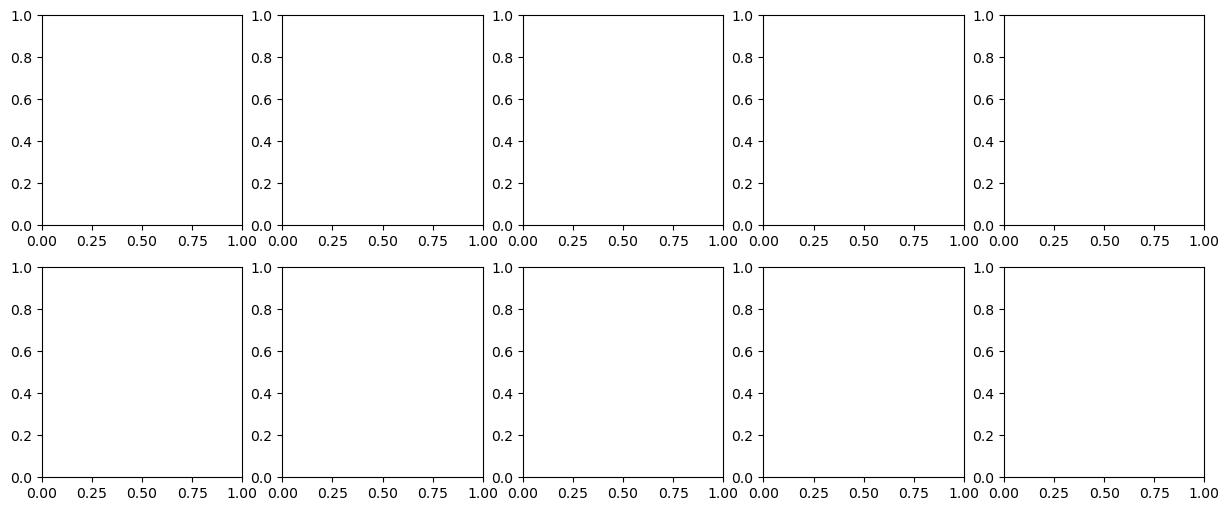

In [21]:
import random
import matplotlib.pyplot as plt

# Zufällige Indizes auswählen
random_indices = random.sample(range(len(X_test)), 10)

# Vorhersagen für die ausgewählten Indizes erhalten
sample_X = X_test[random_indices]
sample_y_true = y_test.iloc[random_indices]
sample_y_pred = random_forest.predict(sample_X)

# Funktion zum Anzeigen der Bilder und Vorhersagen
def plot_sample_predictions(images, true_labels, predicted_labels):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(target_size), cmap='gray')
        ax.set_title(f'True: {true_labels.iloc[i]}\nPredicted: {predicted_labels[i]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Ploten der Vorhersagen
plot_sample_predictions(sample_X, sample_y_true, sample_y_pred)